# *Loading the required modules*





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# *Loading the Dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv',encoding='ISO-8859-1')

# *Understanding the data*

In [ ]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
df.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
df.shape

(584, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


# *Checking for null values*

In [ ]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

# *Checking for duplicate data*

In [ ]:
df.Title.duplicated().sum()

0

# *Performing Analysis*

In [ ]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [ ]:
df.dtypes.value_counts()

object     4
int64      1
float64    1
dtype: int64

In [ ]:
a=df.value_counts(['Genre'])
a

Genre                     
Documentary                   159
Drama                          77
Comedy                         49
Romantic comedy                39
Thriller                       33
                             ... 
Coming-of-age comedy-drama      1
Comedy/Horror                   1
Comedy/Fantasy/Family           1
Comedy mystery                  1
Zombie/Heist                    1
Length: 115, dtype: int64

In [ ]:
df.value_counts(df['Language'])

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
German                          5
Turkish                         5
English/Spanish                 5
Dutch                           3
Marathi                         3
Polish                          3
Filipino                        2
Thai                            2
English/Mandarin                2
English/Japanese                2
English/Hindi                   2
Tamil                           1
English/Akan                    1
Swedish                         1
Spanish/English                 1
Spanish/Catalan                 1
Thia/English                    1
Spanish/Basque                  1
English/Swedish                 1
Malay                           1
Engli

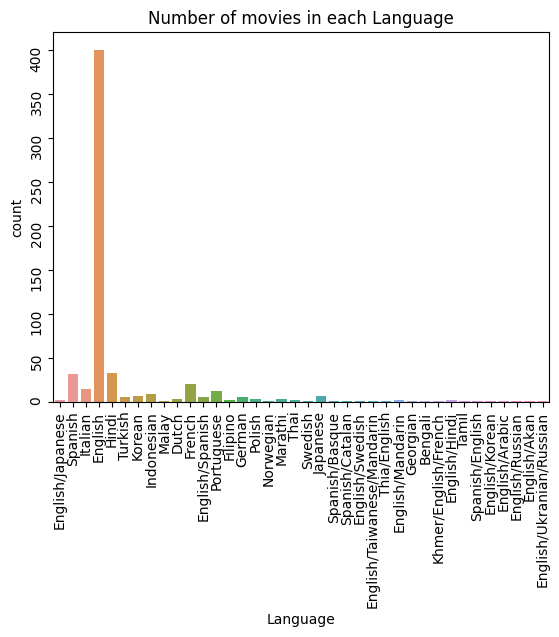

In [ ]:
sns.countplot(x='Language',data=df)
plt.tick_params(rotation=90)
plt.title("Number of movies in each Language")
plt.show()

In [ ]:
df['Language'][[df.value_counts(df['Language']).max()]]

401    English
Name: Language, dtype: object

In [ ]:
np.max(df['IMDB Score'])

9.0

In [ ]:
top10=df.nlargest(10,'IMDB Score')[['Title','IMDB Score']]
top10

,Title,IMDB Score
583,David Attenborough: A Life on Our Planet,9.0
582,Emicida: AmarElo - It's All For Yesterday,8.6
581,Springsteen on Broadway,8.5
578,Ben Platt: Live from Radio City Music Hall,8.4
579,Taylor Swift: Reputation Stadium Tour,8.4
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
576,Cuba and the Cameraman,8.3
577,Dancing with the Birds,8.3
571,13th,8.2
572,Disclosure: Trans Lives on Screen,8.2


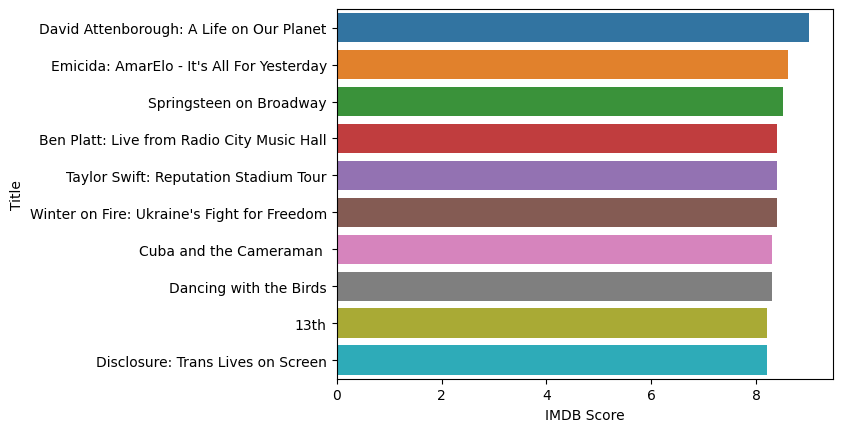

In [ ]:
sns.barplot(x='IMDB Score',y=top10['Title'],data=top10)
plt.show()

In [ ]:
df.groupby('Title')['IMDB Score'].max().sort_values(ascending=False)

Title
David Attenborough: A Life on Our Planet      9.0
Emicida: AmarElo - It's All For Yesterday     8.6
Springsteen on Broadway                       8.5
Ben Platt: Live from Radio City Music Hall    8.4
Taylor Swift: Reputation Stadium Tour         8.4
                                             ... 
Kaali Khuhi                                   3.4
The Open House                                3.2
The App                                       2.6
Dark Forces                                   2.6
Enter the Anime                               2.5
Name: IMDB Score, Length: 584, dtype: float64

In [ ]:
df[df['Runtime']>=180]['Title']

561    The Irishman
Name: Title, dtype: object

In [ ]:
df.value_counts(df['Genre']).count()

115

In [ ]:
df.value_counts(df['Language']).count()

38

In [ ]:
#total no of languages
df['Language'].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [ ]:
df.groupby('Genre')['Language'].max()

Genre
Action                       Hindi
Action comedy                Malay
Action thriller            English
Action-adventure    English/Korean
Action-thriller         Indonesian
                         ...      
War                        English
War drama             English/Akan
War-Comedy                 English
Western                 Portuguese
Zombie/Heist               English
Name: Language, Length: 115, dtype: object

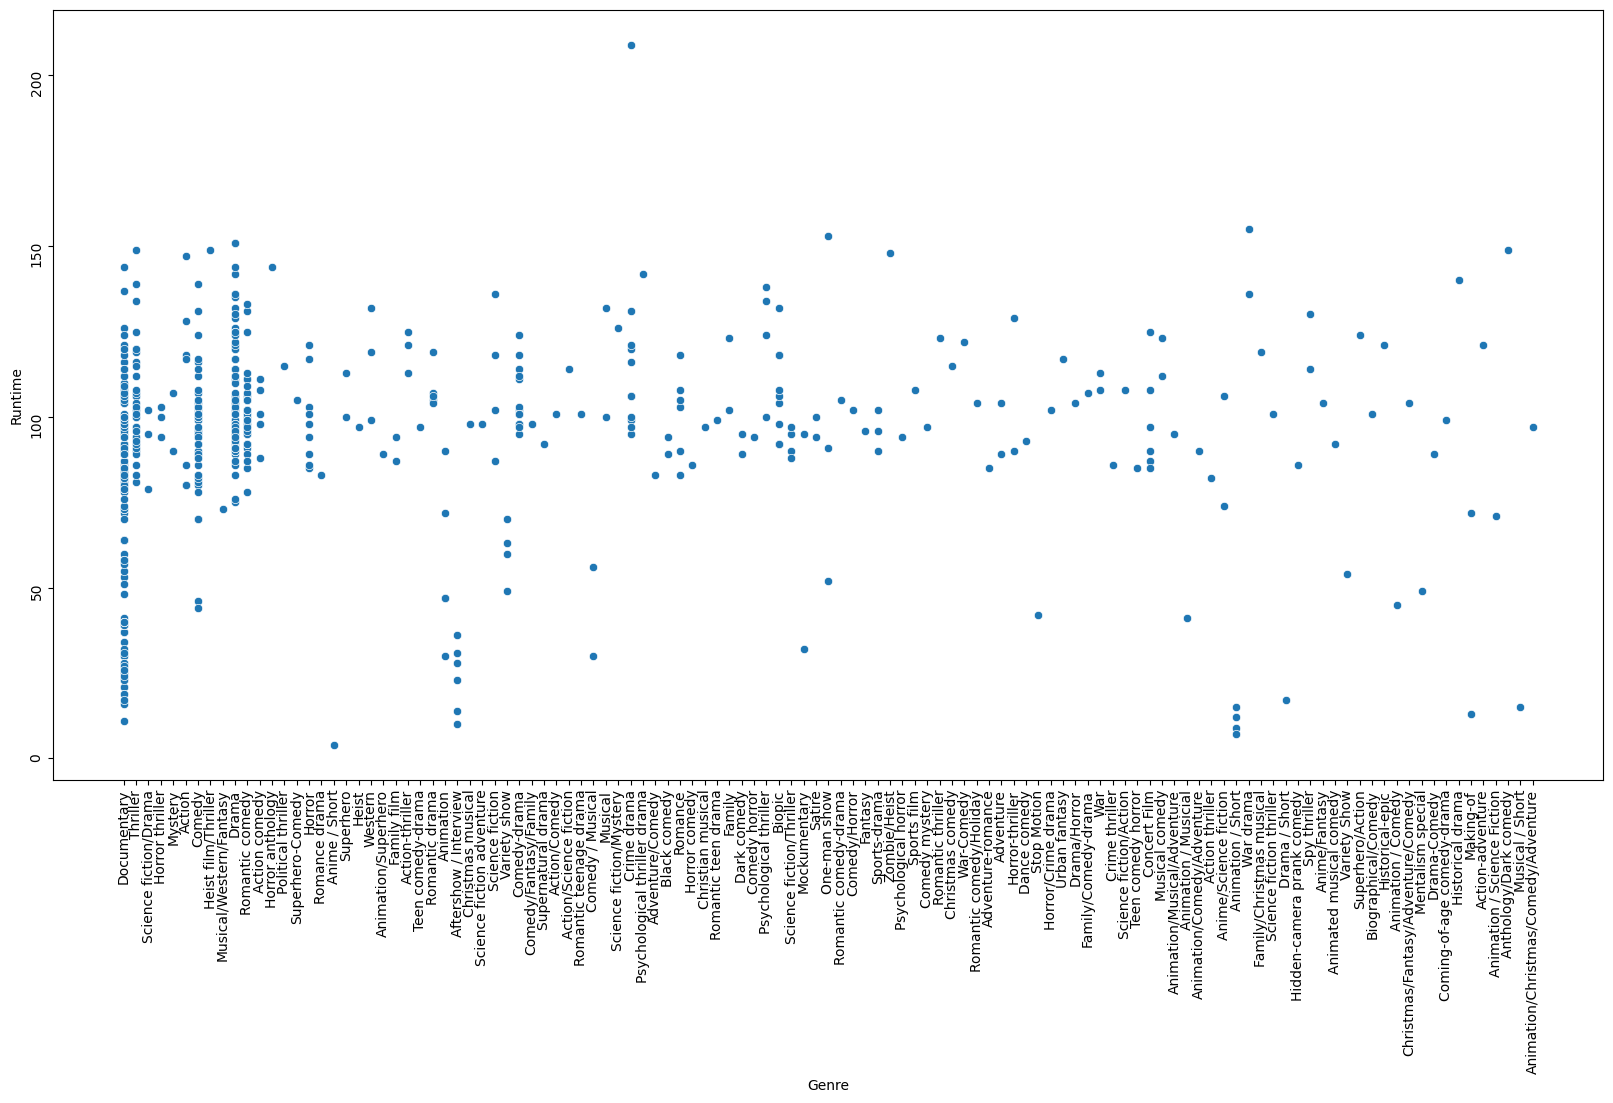

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Genre',y='Runtime',data=df)
plt.tick_params(rotation=90)
plt.show()

## Feature Engineering

In [ ]:
df["Date"] = pd.to_datetime(df.Premiere)
df["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [ ]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
print(df.head())

             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language       Date  Year  Month  
0         2.5  English/Japanese 2019-08-05  2019      8  
1         2.6           Spanish 2020-08-21  2020      8  
2         2.6           Italian 2019-12-26  2019     12  
3         3.2           English 2018-01-19  2018      1  
4         3.4             Hindi 2020-10-30  2020     10  


In [ ]:
import plotly.express as px


In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=df, x="IMDB Score", y="Runtime")
fig.show()

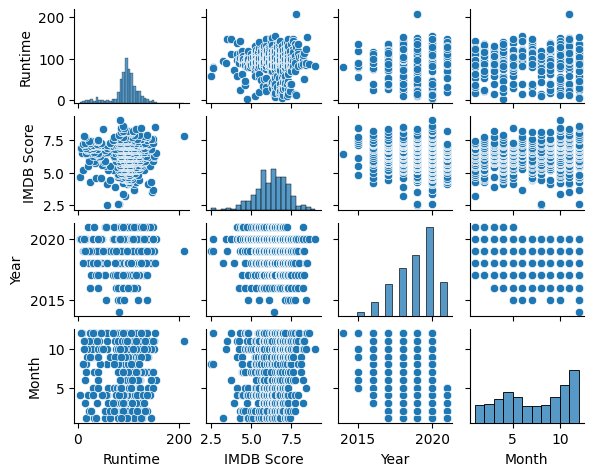

In [ ]:
sns.pairplot(df, height=1.2, aspect=1.25)
plt.savefig('pariplot.png');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
 7   Year        584 non-null    int64         
 8   Month       584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 41.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Title','Genre','Runtime','Premiere','Language','Date','Year','Month']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
x=df.drop(['Premiere','Month','IMDB Score'], axis=1)
y=df['IMDB Score']

In [ ]:
print(x)
print(y)

     Title  Genre  Runtime  Language  Date  Year
0      147     45       42         6   182     5
1      120    106       56        29   281     6
2      433     93       54        20   219     5
3      500     63       69         2    85     4
4      243     73       65        18   312     6
..     ...    ...      ...       ...   ...   ...
579    425     40      100         2   140     4
580    575     45       66        13     6     1
581    410     74      121         2   138     4
582    145     45       64        28   331     6
583    121     45       58         2   299     6

[584 rows x 6 columns]
0      2.5
1      2.6
2      2.6
3      3.2
4      3.4
      ... 
579    8.4
580    8.4
581    8.5
582    8.6
583    9.0
Name: IMDB Score, Length: 584, dtype: float64


# Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(467, 6)
(467,)
(117, 6)
(117,)


# Building a model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf = RandomForestRegressor(n_estimators=15,max_depth=15,random_state=0,criterion='squared_error')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=15, random_state=0)

In [ ]:
y_pred=rf.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.845


# Evaluation Metrics


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.6575585906821325
Mean Squared Error (MSE): 0.7138135847776027
Root Mean Squared Error (RMSE): 0.8448748929738666
R-squared (R2): 0.31227950251748593


# Visualization

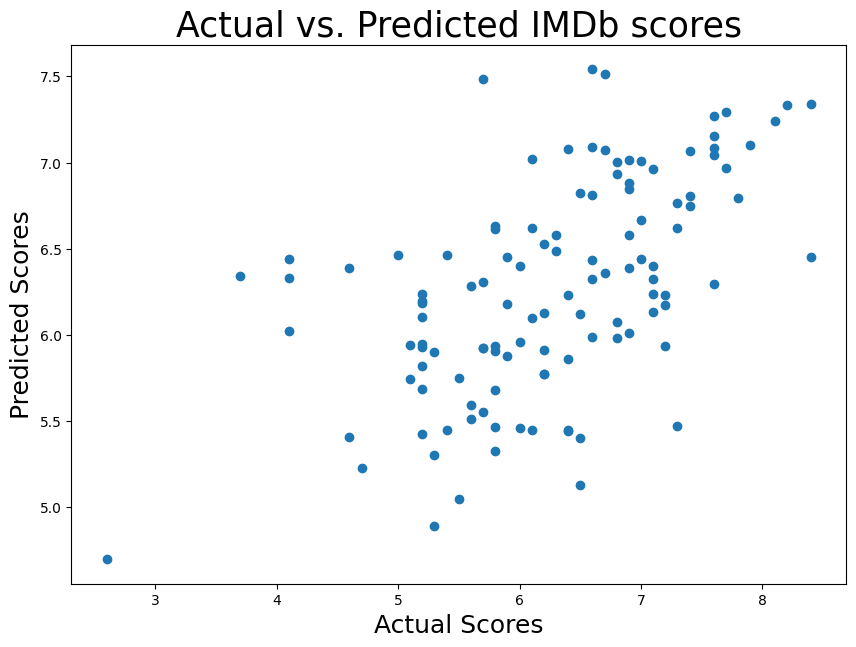

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. Predicted IMDb scores",fontsize=25)
plt.xlabel("Actual Scores",fontsize=18)
plt.ylabel("Predicted Scores", fontsize=18)
plt.scatter(x=y_test,y=y_pred)
plt.savefig("Randomforest.png")

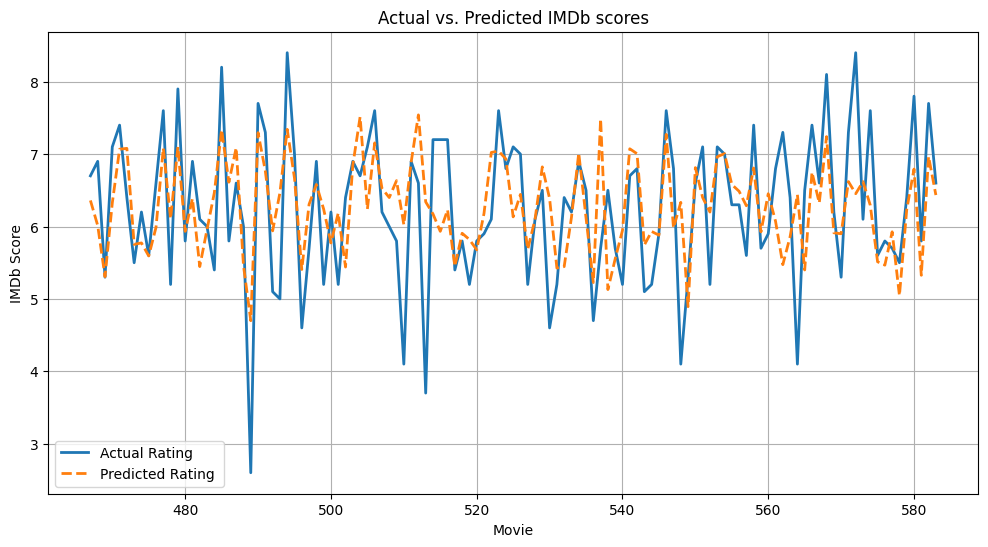

In [ ]:
df_range=df.index[-len(y_test):]

plt.figure(figsize=(12,6))
plt.plot(df_range,y_test,label='Actual Rating ',linewidth=2)
plt.plot(df_range,y_pred,label='Predicted Rating ',linestyle='--',linewidth=2)
plt.title("Actual vs. Predicted IMDb scores")
plt.legend()
plt.xlabel('Movie')
plt.ylabel('IMDb Score')
plt.grid()
plt.show()

# Other Models We bulit

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score


In [ ]:
x=df.drop(['IMDB Score'], axis=1)
y=df['IMDB Score']

In [ ]:
k = 55 # Choose the value of k
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=55)

In [ ]:
y_pred = knn.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.8036519036519036
Mean Squared Error (MSE): 1.0272755244755247
Root Mean Squared Error (RMSE): 1.0135460149768853
R-squared (R2): 0.010276002292628927


In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
y_pred=lr.predict(x_test)
rmse1 = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse1)


RMSE:  1.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.8160952869715199
Mean Squared Error (MSE): 0.9993713758390388
Root Mean Squared Error (RMSE): 0.9996856385079456
R-squared (R2): 0.03716012917302325


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred=dt.predict(x_test)
rmse2=float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse2)


RMSE:  1.221


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.8914529914529914
Mean Squared Error (MSE): 1.4903418803418804
Root Mean Squared Error (RMSE): 1.2207955931858046
R-squared (R2): -0.43586320185693217


In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)


SVR(kernel='linear')

In [ ]:
y_pred=svr.predict(x_test)
rmse3=float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse3)


RMSE:  1.025


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.8163283215996394
Mean Squared Error (MSE): 1.0501367297588973
Root Mean Squared Error (RMSE): 1.0247617917149805
R-squared (R2): -0.011749523426987762


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators': 10,
          'learning_rate': 0.01,
          'criterion':'squared_error'}
gbr=GradientBoostingRegressor(**params)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=10)

In [ ]:
y_pred=gbr.predict(x_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_true is your true target values and y_pred is the predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 0.7970444173047133
Mean Squared Error (MSE): 0.9984548130175558
Root Mean Squared Error (RMSE): 0.9992271078276228
R-squared (R2): 0.03804318751347302


Mean Squared Error: 0.9847850948511397
R-squared: 0.051213216185289956


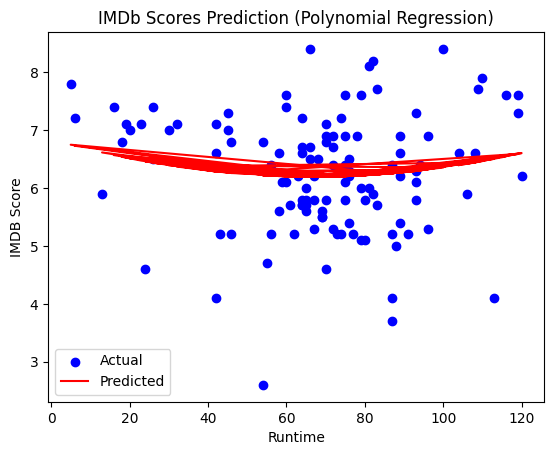

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



x = df['Runtime'].values.reshape(-1, 1)
y = df['IMDB Score'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degree=2

poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('IMDb Scores Prediction (Polynomial Regression)')
plt.xlabel('Runtime')
plt.ylabel('IMDB Score')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data=df

# Define the IMDb score categories (you can adjust these based on your data)
data['IMDB_Score_Category'] = pd.cut(data['IMDB Score'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

X = data[['Runtime']]
y = data['IMDB_Score_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 69.23%
